<a href="https://colab.research.google.com/github/geocarvalho/python-ds/blob/master/applied-data-science-with-python/applied_ml_in_python/week3_applied_ml_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied ML in Python

## Week 3 - Module 3 (Evaluation)

### Model evaluation and selection

* **Accuracy** is the fraction of samples that were classified correctly;

#### Represent/train/evaluate/refine cyscle

* **Representation**: Extract and select object features;

* **Train models**: Fit the estimator to the data;

* **Evaluation**: Are used to select between different trained models or settings;

* **Feature and model refinement**

#### Evaluation

* Different applications have very different goals;

* Accuracy is widely used, but many others are possible;

* It's very important to choose evaluation methods that match the goal of your application;

* Compute your selected evaluation metric for multiple different models and select the model with best of evaluation metric;

#### Accuracy with imalanced classes

* Suppose you have two classes:
 - Relevant(R): the positive class;
 - Not_relevant(N): the negative class

* Out of 1000 randomly selected items, on average;
 - One item is relevant and has an R label;
 - The rest of the items (999 of them) are not relevant and labelled N;

* Recall that:  $ accuracy = \frac{correct \space predictions}{total \space instances}$

* You build a classifier to predict relevant items, and see that its accuracy on a test set is 99.9%. For comparison, suppose we had a "dummy" classifier that didn't look at the features at all, and always just blindy predicted the most frequent class;

* Assuming a test set of 1000 instances, what would this dummy classifier's accuracy be?

$accuracy_{dummy} = 999/1000  = 99.9%$

In [0]:
import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches

def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    crime = pd.read_table('readonly/CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
    crime = crime.ix[:,columns_to_keep].dropna()

    X_crime = crime.ix[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)

def plot_decision_tree(clf, feature_names, class_names):
    # This function requires the pydotplus module and assumes it's been installed.
    # In some cases (typically under Windows) even after running conda install, there is a problem where the
    # pydotplus module is not found when running from within the notebook environment.  The following code
    # may help to guarantee the module is installed in the current notebook environment directory.
    #
    # import sys; sys.executable
    # !{sys.executable} -m pip install pydotplus

    export_graphviz(clf, out_file="adspy_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
    with open("adspy_temp.dot") as f:
        dot_graph = f.read()
    # Alternate method using pydotplus, if installed.
    # graph = pydotplus.graphviz.graph_from_dot_data(dot_graph)
    # return graph.create_png()
    return graphviz.Source(dot_graph)

def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(numpy.arange(c_features), feature_names)

def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(numpy.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()


def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                         numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])


    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')

    plt.show()

def plot_two_class_knn(X, y, n_neighbors, weights, X_test, y_test):
    X_mat = X
    y_mat = y

    # Create color maps
    cmap_light = ListedColormap(['#FFFFAA', '#AAFFAA', '#AAAAFF','#EFEFEF'])
    cmap_bold  = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                         numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    title = "Neighbors = {}".format(n_neighbors)
    if (X_test is not None):
        train_score = clf.score(X_mat, y_mat)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    patch0 = mpatches.Patch(color='#FFFF00', label='class 0')
    patch1 = mpatches.Patch(color='#000000', label='class 1')
    plt.legend(handles=[patch0, patch1])

    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title(title)

    plt.show()

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
%matplotlib inline

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
  print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print("Original labels: ", y[1:30])
print("New binary labels:", y_binary_imbalanced[1:30])

Original labels:  [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels: [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [6]:
np.bincount(y_binary_imbalanced)

array([1615,  182])

In [7]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
svm = SVC(kernel="rbf", C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

In [8]:
# Dummy classifier
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
y_dummy_predictions = dummy_majority.predict(X_test)
y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

#### Dummy classifiers completely ignore the input data

* Dummy classifiers serve as a sanity check on your classifier's performance;

* They provide a null metric (e.g. null accuracy) baseline;
> The accuracy that can be achieved by always picking the most frequent class.

* Dummy classifiers should not be used for real problems;
> It does provide a useful sanity check in point of comparison.

* Some commonly-used settings for the `strategy` parameter for DummyClassifier in scikit-learn:
 - `most_frequent`: predicts the most frequent label in the training set;
 - `stratified`: random predictions based on training set class distribution;
 - `uniform`: generates predictions uniformly at random;
 - `constant` always predicts a constant label provided by the user.

> A major motivation of this method is F1-scoring, when the positive class is in the minority.

#### What if my classifier accuracy is close to the null accuracy baseline?

* Ineffective, erroneous or missing features;
* Poor choice of kernel or hyperparameter;
* Large class imbalance.

In [10]:
svm = SVC(kernel="linear", C=1).fit(X_train, y_train)
svm.score(X_test, y_test) 

0.9777777777777777

#### Dummy regressors

* `strategy` parameter options:
 - `mean`: predicts the mean of the training targets;
 - `median`: predicts the median of the training targets;
 - `quantile`: predicts a user-provided quantile of the training targets;
 - `constant`: predicts a constant user-provided value.

#### Binary prediction outcomes

|               | Predicted negative | Predicted positive |
|---------------|--------------------|--------------------|
| True negative | TN                 | FP                 |
| True positive | FN                 | TP                 |

* Label 1 = positive class (class of interest);
* Label 2 = negative class (everything else)
* TP = true positive;
* FP = false positive (type 1 error);
* TN = true negative;
* FN = false negative (type 2 error).

#### Confusion matrix for binary prediction task

|               | Predicted negative | Predicted positive |
|---------------|--------------------|--------------------|
| True negative | TN=356             | FP=51              |
| True positive | FN=38              | TP=5               |

* Every test instance is in exactly one box (integer counts);

* Breaks down classifier results by error type;

* Provides more information than simple accuracy;

* Helps you choose an evaluation metric that matches project goals;

* Not a single number like accuracy, but there are many possible metrics that can be derived from the confusion matrix.

In [11]:
from sklearn.metrics import confusion_matrix

dummy_majority = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


* TN e FN in the first column and TP and FP in the second;
* The successful prediction of the classifier are on the diagonal, where the true class matches the predicted class;
* The cells off the diagonal represent errors of different types;

In [12]:
dummy_classprop = DummyClassifier(strategy="stratified").fit(X_train, y_train)
y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)

Random class-proportional prediction (dummy classifier)
 [[363  44]
 [ 38   5]]


In [13]:
svm = SVC(kernel="linear", C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, c=1)\n', confusion)

Support vector machine classifier (linear kernel, c=1)
 [[402   5]
 [  5  38]]


In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print("Logistic regression classifier (default settings)\n", confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  8  35]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print("Decision tree classifier (max_depth=2)\n", confusion)

Decision tree classifier (max_depth=2)
 [[400   7]
 [ 17  26]]


---
### Confusion matrices and basic evaluation metrics

| N=450         | Predicted negative | Predicted positive |
|---------------|--------------------|--------------------|
| True negative | TN=400             | FP=7               |
| True positive | FN=17              | TP=26              |

$ accuracy = \frac{TN+TP}{TN+TP+FN+FP} = \frac{400+26}{400+26+17+7} = 0.95$

$classification error = \frac{FP+FN}{TN+TP+FN+FP} = 1-accuracy = 0.06$

$recall = \frac{TP}{TP+FN} = 0.6$

* Recall is also known as: tru positive rate (TPR), sensitivity and probability of detection;

$precision = \frac{TP}{TP+FP} = 0.79$

* To increase **precision** we must either increase the number of TP or reduce the FP rate;

$FPR = \frac{FP}{TN+FP} = 0.02$

* The false positive rate (FPR) is also known as **specificity**.

####  Precision and recall interpretation

* A precision of 0.68 means that about 68% or 13 of the 19 instances of the points in the positive prediction region are correctly labeled as **positive**;

* A recall of 0.87 means that of all true positive instances, the positive prediction region has found about 87% of them or 13 out of 15;

* High precision, lower recall;
> All the points on the positive prediction region 7/7 are TP given a perfect precision of 1. It comes with a cost because out of 15 positive instances, 8 are FN.

$precision = \frac{TP}{TP+FP} = \frac{7}{7+0} = 1.0$

$recall = \frac{TP}{TP+FN} = \frac{7}{7+8} = 0.47$

* Low precision, high recall;
> We want o minimize FN and obtain high recall. Now all 15 positive instances have been correctly predicted as being in the positive class. It also comes with a cost, since the number of FP gone up, dropping the precision.

$precision = \frac{15}{15+27} = 0.36$

$recall = \frac{15}{15+0} = 1.00$

#### There is often a tradeoff between precision and recall

* Recall-oriented machine-learning tasks:
 - Search and information extraction in legal discovery;
 - Tumor detection;
 - Often paired with a human expert to filter out FP.

* Precision-oriented machine learning tasks:
 - Search engine ranking query suggestion;
 - Document classification;
 - Many customer-facing tasks (users remember failures).

#### F1-score: combining precision and recall into a single number

$F1 = 2.\frac{precision \times recall}{precistion+recall} = \frac{2\times TP}{2\times TP+FN+FP}$

* Is based on harmonic mean of precision and recall;

* F1 score is a special case of F-score that introduces a paramerter beta;

$F_{\beta} = (1 + \beta^2 \times \frac{precision \times recall}{(\beta^2 \times precision) + recall} = \frac{(1+\beta^2)\times TP}{(1+\beta^2)\times TP+\beta \times FN+FP}$

* Beta allows adjustment of the metric to control the emphasis on recall vs precision:
 - Precision-oriented users: $\beta=0.5$
 > FP hurt performance more than FN.
 - Recall-oriented users: $\beta=2$
 > FN hurt performance more than FP.
 - Setting $\beta=1$  corresponds to f1-score.
 > We just saw weights precision and recall equally.

In [16]:
# Evaluation metrics for binary classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy: {:.2f}".format(accuracy_score(y_test, tree_predicted)))
print("Precision: {:.2f}".format(precision_score(y_test, tree_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, tree_predicted)))
print("F1: {:.2f}".format(f1_score(y_test, tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=["not_1", "1"]))

              precision    recall  f1-score   support

       not_1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [18]:
print("Random class-proportional (dummy)\n",
      classification_report(y_test, y_classprop_predicted, target_names=["not_1", "1"]))

print("SVM\n",
      classification_report(y_test, svm_predicted, target_names=["not_1", "1"]))

print("Logistic regression\n",
      classification_report(y_test, lr_predicted, target_names=["not_1", "1"]))

print("Decision tree\n",
      classification_report(y_test, tree_predicted, target_names=["not_1", "1"]))


Random class-proportional (dummy)
               precision    recall  f1-score   support

       not_1       0.91      0.89      0.90       407
           1       0.10      0.12      0.11        43

    accuracy                           0.82       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.83      0.82      0.82       450

SVM
               precision    recall  f1-score   support

       not_1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not_1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg 

---
### Classifier decision functions (decision_function)

* Each classifier score value per test point indicates how confiently the classifier predicts the positive class (large magnitude **positive** values) or the **negative** class (large magnitude negative values);

* Choosing a fixed decision threshold gives a classification rule;

* By sweeping the decision threshold through the entire range of possible score values; we get a series of classification outcomes that form a curve;



In [19]:
# Decision functions
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced,
                                                    random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

y_score_list

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[(0, -29.828788441785033),
 (0, -19.382924793512874),
 (0, -29.198335138585666),
 (0, -21.746179452413866),
 (0, -22.64239706142783),
 (0, -11.806009239931573),
 (1, 6.496016147080556),
 (0, -23.35456545701549),
 (0, -27.5434551101218),
 (0, -26.888219314276732),
 (0, -31.862703999560456),
 (0, -22.486128999408205),
 (0, -25.318000345574035),
 (0, -13.38456205419778),
 (0, -13.565609990855048),
 (0, -13.308402070394045),
 (1, 12.18078625711733),
 (0, -34.36249073173575),
 (0, -13.231505077380163),
 (0, -29.59393677309081)]

#### Predicted probability of class membership (predict_proba)

* Typical rule: choose most likely class;
 - e.g. class 1 if threshold > 0.5.

* Adjusting threshold affects predictions of classifier;

* Higher threshold results in a more conservative classifier;
 - e.g. only predict class 1 if estimated probability of class 1 is above 70%;
 - This increases precision and doesn't predict class 1 as often, but when it does, it gets high porportion of class 1 instances correct.

* Not all models provide realistic probability estimates; 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced,
                                                    random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20, 1]))

y_proba_list

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[(0, 1.1105082208232874e-13),
 (0, 3.820346172604105e-09),
 (0, 2.0860473814375808e-13),
 (0, 3.595458341363987e-10),
 (0, 1.4673438599173205e-10),
 (0, 7.459540808226165e-06),
 (1, 0.998492834356983),
 (0, 7.198484846185495e-11),
 (0, 1.0915143083465744e-12),
 (0, 2.1018161444089108e-12),
 (0, 1.4527921163895185e-14),
 (0, 1.7155297591126663e-10),
 (0, 1.0104903189398316e-11),
 (0, 1.5387139421779702e-06),
 (0, 1.2838961002847254e-06),
 (0, 1.6604801824725314e-06),
 (1, 0.999994871982292),
 (0, 1.1927787429505822e-15),
 (0, 1.7932035040594141e-06),
 (0, 1.4044832419844635e-13)]

#### Varying the decision threshold

* Changing the classifier score we have a precision/recall variation according to the precision/recall curve;

---

### Precision-recall and ROC curves

* An ideal classifier would be able to achieve perfect precision and recall of 1.0 both;

* In general, with precision-recall curves, the closer the curve is to the top right corner, the more preferable and beneficinal the tradeoof it gives between precision and recall.

#### ROC curves

* Receiver operating characteristic curves (ROC) are a very widely used visualization method that illustrate the performance of a binary classifier;

* The x-axis show a classifier FP rate (varies from 0 to 1) and on the y-axis show a classifier's TP rate (also from 0 to 1);

* The ideal point in ROC space is one where the classifier achieves zero (FP=0) and TP rate of 1;

* The line in the diagonal is a random classifier used as baseline. A good classifier will give an ROC curve that is consistently better than random across all decision threshold choices; 
> An excellent classifier would be way up into the left increasing.

* We want classifiers that maximize the TP rate while minimizing the FP rate;

* WE can qualify the goodness of a classifier by looking at how much are there is underneath the curve, the area under the curve (AUC).
> An AUC of 0 represents a very bad classifier, and an AUC of 1 a perfect one.

---

### Multi-class evaluation

* Is an extension of the binary case;
 - A collection of true vs predicted binary outcomes, one per class;
 - Confusion matrices are especially useful;
 - Classification report.

* Overall evaluation metrics are averages across classes;
 - But there are different ways to average multi-class results: we will cover these shortly;
 - The support (number of instances) for each class is important to consider.
 > e.g. in case of imbalanced classes.
* Multi-label classification: each instance can have multiple labels (not covered in the course).

#### Multi-class confusion matrix

* Is a matrix of $n \times n$ according to the number of classes;
 
* The true class matches the predicted class are all along the diagonal and misclassification are off the diagonal;

Text(0.5, 15.0, 'Predicted label')

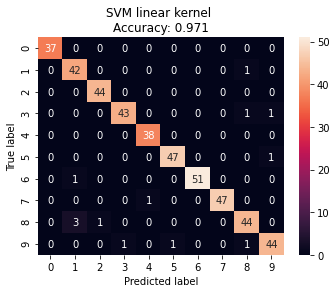

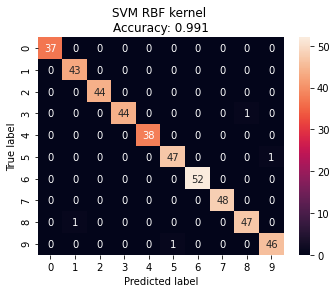

In [21]:
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(
    X, y, random_state=0
)

svm = SVC(kernel="linear").fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc)

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title("SVM linear kernel \nAccuracy: {0:.3f}".format(
    accuracy_score(y_test_mc, svm_predicted_mc)
))
plt.ylabel("True label")
plt.xlabel("Predicted label")

svm = SVC(kernel="rbf").fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc)

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title("SVM RBF kernel \nAccuracy: {0:.3f}".format(
    accuracy_score(y_test_mc, svm_predicted_mc)))
plt.ylabel("True label")
plt.xlabel("Predicted label")

* In the confusion matrix we can get some insight into what kind of errors it's making for each class, including whether some classes are much more prone to certain kinds of errors than others. 

In [22]:
# Multi-class classification report
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



#### Micro vs. macro average

| class  | recall  |
|--------|---------|
| orange | 1/5 = 0.2 |
| lemon  | 1/2 = 0.5 |
| apple  | 2/2 = 1.0 |

* **Macro-average**: Each class has equal weight;
 1. compute metric within each class;
 2. average resulting metrics across classes.

 - In macro-average recall each class has equal weight;

  $Macro \space average \space recall: (0.2+0.5+1)/3 = 0.57$

* **Micro-average**: Each instance has equal weight and largest classes have most influence;
 1. aggregate outcomes across all classes;
 2. compute metric with aggregate outcomes.
 $Micro \space average \space recall: 4/9 = 0.44$

 > We treat the entire set of results as an aggregate outcome.

* If the classes have about the same number of instances, macro and micro-average will be about the same;

* If some classes are much larger (more instances) than others, and you want to:
 - Weight your metric toward the largest ones, use **micro-averaging**;
 - Weight your metric toward the smallest ones, use **macro-averaging**;

* If the micro-average is much lower than the macro-average then examine the larger classes for poor metric performance;

* If the macro-average is much lower than the micro-average then examine the smaller classes for poor metric performance.

In [23]:
# Micro vs. macro-averaged metrics
print("Micro-averaged precision = {:.2f} (treat instances equally)".format(
    precision_score(y_test_mc, svm_predicted_mc, average="micro")
))

print("Macro-averaged precision = {:.2f} (treat classes equally)".format(
    precision_score(y_test_mc, svm_predicted_mc, average="macro")
))

Micro-averaged precision = 0.99 (treat instances equally)
Macro-averaged precision = 0.99 (treat classes equally)


In [24]:
print("Micro-averaged f1 = {:.2f} (treat instances equally)".format(
    f1_score(y_test_mc, svm_predicted_mc, average="micro")
))

print("Macro-averaged f1 = {:.2f} (treat classes equally)".format(
    f1_score(y_test_mc, svm_predicted_mc, average="macro")
))

Micro-averaged f1 = 0.99 (treat instances equally)
Macro-averaged f1 = 0.99 (treat classes equally)


---

### Regression evaluation

#### Regression metrics

* Typically `r2_score` is enough
 - Reminder: computes how well future instances will be predicted;
 - Best possible score is 1;
 - Constant prediction score is 0.

* Alternative metrics include:
 - `mean_absolute_error` - mean absolute difference of target and predicted values;
 > Corresponds to the expected value of L1 norm loss.
 - `mean_squared_error` - mean  difference of target and predicted values;
 > Correspond to the expected value of L2 norm loss.
 - `median_absolute_error` - robust ot outliers.

#### Dummy regressors

* As in classification, comparison to a "dummy" prediction model that uses a fixed rule can be useful. For this, scikit-learn provides dummy regressors.

Linear model, coefficients [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


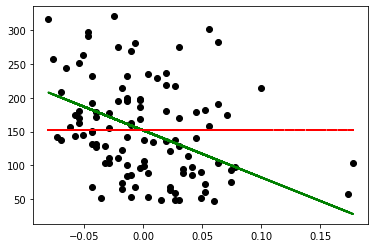

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn import datasets

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy="mean").fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print("Linear model, coefficients", lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(
    mean_squared_error(y_test, y_predict_dummy_mean)
))
print("Mean squared error (linear model): {:.2f}".format(
    mean_squared_error(y_test, y_predict)
))
print("r2_score (dummy): {:.2f}".format(
    r2_score(y_test, y_predict_dummy_mean)
))
print("r2_score (linear model): {:.2f}".format(
    r2_score(y_test, y_predict)
))

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_predict, color="green", linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color="red", linestyle="dashed",
         linewidth=2, label="dummy")
plt.show()


#### Dummy regressors

* The `DummyRegressor` class implements four simple baseline rules for regression, using the `strategy`parameter:
 - `mean` predicts the mean of the training target values;
 - `median` predicts the median of the training target values;
 - `quantile` predicts a user-provided quantile of the training target values;
 > e.g. value at $75^{th}$ percentile.
 - `constant` value provided by the user.

#### Practical Guide to Controlled Experiments on the Web (optional)
Beyond the essential evaluation metrics covered in this course, online controlled experiments, which involve A-B testing and other techniques, are perhaps the most important way that machine learning algorithms are evaluated for real-world use in Web and other online applications. This article by Ron Kohavi, Randal Henne, and Dan Sommerfield, reviews the key points of running controlled experiments, along with important engineering issues and limitations to keep in mind when using them.

Kohavi, R., Henne, R. M., & Sommerfield, D. (2007). [Practical guide to controlled experiments on the web](https://ai.stanford.edu/~ronnyk/2007GuideControlledExperiments.pdf). Proceedings of the 13th ACM SIGKDD international conference on Knowledge discovery and data mining - KDD '07. doi:10.1145/1281192.1281295

---

### Model selection: Optimizing classifiers for different evaluation metrics

#### Model selection using evaluation metrics

* Train/test on same data
 - Single metric;
 - Typically overfits and likely won't generalize well to new data;
 - Can serve as a sanity check: low accuracy on the training set may indicate an implementation problem.

* Single train/test split
 - Single metric;
 - Speed and simplicity;
 - Lack of variance information.

* K-fold cross-validation
 - K train-test split;
 - Average metric over all splits;
 - Can be combined with parameter grid search: GridSearchCV (cv=3).


In [26]:
# Cross-validation example
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()

X, y = dataset.data, dataset.target == 1
clf = SVC(kernel="linear", C=1)

print("Cross-validation (accuracy)", cross_val_score(clf, X, y, cv=5))
print("Cross-validation (AUC)", cross_val_score(clf, X, y, cv=5, scoring="roc_auc"))
print("Cross-validation (recall)", cross_val_score(clf, X, y, cv=5, scoring="recall"))

Cross-validation (accuracy) [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
Cross-validation (recall) [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


In [28]:
# Grid search example
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

clf = SVC(kernel="rbf")
grid_values = {"gamma": [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

grid_clf_acc = GridSearchCV(clf, param_grid=grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test)

print("Grid best parameter (max. accuracy): ", grid_clf_acc.best_params_)
print("Grid best score (accuracy): ", grid_clf_acc.best_score_)

grid_clf_auc = GridSearchCV(clf, param_grid=grid_values, scoring="roc_auc")
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test)

print("Test set AUC: ", roc_auc_score(y_test, y_decision_fn_scores_auc))
print("Grid best parameter (max. AUC): ", grid_clf_auc.best_params_)
print("Grid best score (AUC): ", grid_clf_auc.best_score_)

Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9985157648354676
Test set AUC:  0.99982858122393
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  1.0


In [29]:
# Evaluation metrics supported for model selection

from sklearn.metrics.scorer import SCORERS

sorted(list(SCORERS.keys()))

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'balances'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'balances'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'balances'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_valida

Grid best parameter (max. precision): 0.5271470588235295
Grid best score (precision): 0.5271470588235295


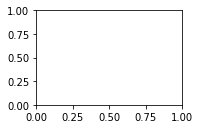

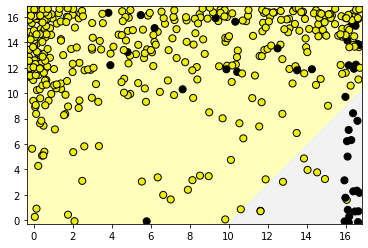

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'balances'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'balances'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'balances'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_valida

Grid best parameter (max. recall): 0.9285714285714285
Grid best score (recall): 0.9285714285714285


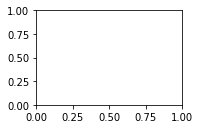

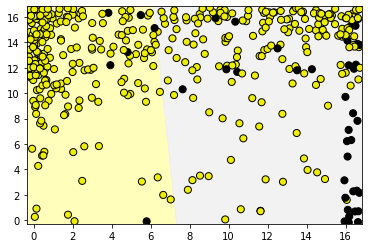

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'balances'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'balances'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'balances'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_valida

Grid best parameter (max. f1): 0.5369334978145606
Grid best score (f1): 0.5369334978145606


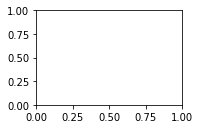

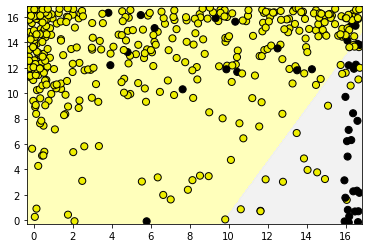

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'balances'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'balances'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'balances'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_valida

Grid best parameter (max. roc_auc): 0.8930754619174083
Grid best score (roc_auc): 0.8930754619174083


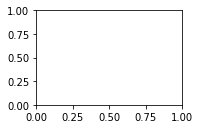

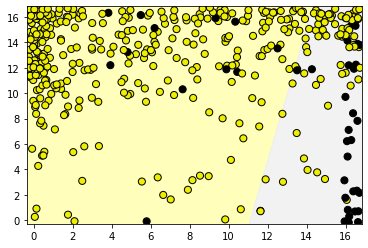

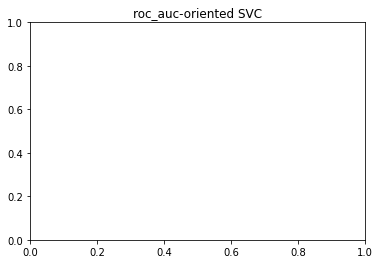

In [31]:
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]] + np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel="linear").fit(X_twovar_train, y_train)
grid_values = {"class_weight":[
                               "balanced", {1:2}, {1:3}, {1:4}, {1:5}, {1:10}, {1:20}, {1:50}]}
plt.figure()

for i, eval_metric in enumerate(("precision", "recall", "f1", "roc_auc")):
  grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
  grid_clf_custom.fit(X_twovar_train, y_train)
  print("Grid best parameter (max. {0}): {1}".format(
      eval_metric, grid_clf_custom.best_score_
  ))
  print("Grid best score ({0}): {1}".format(
      eval_metric, grid_clf_custom.best_score_
  ))
  plt.subplot(2,2,i+1)
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  plot_class_regions_for_classifier(grid_clf_custom, X_twovar_test, y_test)
  plt.title(eval_metric + "-oriented SVC")

plt.show()

<Figure size 432x288 with 0 Axes>

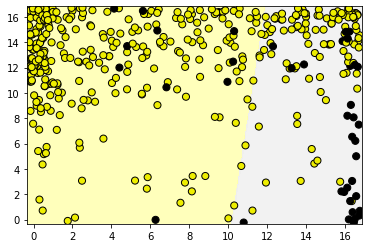

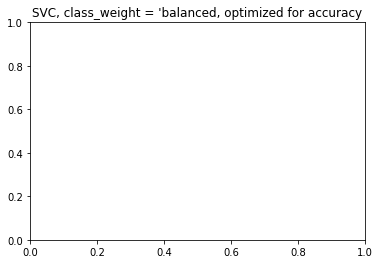

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


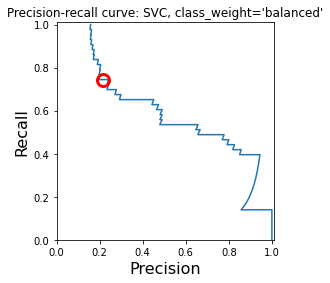

At zero threshold, precision: 0.22, recall: 0.74


In [35]:
# Precision-recall curve for the default SVC classifier (with balanced class weights)
from sklearn.metrics import precision_recall_curve

jitter_delta = 0.25
X_twovar_train = X_train[:, [20, 59]] + np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test = X_test[:, [20, 59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel="linear", class_weight="balanced").fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced, optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title("Precision-recall curve: SVC, class_weight='balanced'")
plt.plot(precision, recall, label="Precision-recall curve")
plt.plot(closest_zero_p, closest_zero_r, "o", markersize=12, fillstyle="none",
         c="r", mew=3)
plt.xlabel("Precision", fontsize=16)
plt.ylabel("Recall", fontsize=16)
plt.axes().set_aspect("equal")
plt.show()

print("At zero threshold, precision: {:.2f}, recall: {:.2f}".format(
    closest_zero_p, closest_zero_r
))

* The red circle represents the precision-recall trade-off achieved at the zero score mark, which is the actual decision boundary chosen for the trained classifier.

#### Training, validation and test framework for model selection and evaluation

* Using only cross-validation or a test set to do model selection may lead to more subtle overfitting/optimistic generalization estimates;

* Instead, use three data splits:
 1. training set (model building);
 2. validation set (model selection);
 3. test set (final evaluation).

* In practice:
 1. create a initial training/test split;
 2. do cross-validation on the training data for model/parameter selection;
 3. Save the held-out test set for final model evaluation.

#### Concluding notes

* Accuracy is often not the right evaluation metric for many real world machine learning tasks;
 - FP and FN may need to be treated very differently;
 - Make sure you understand the needs of your application and choose an evaluation metric that matches your application, user, or business goals.

* Examples of additional evaluation methods include:
 - Learning curve: How much does accuracy (or other metric) change as a function of the amount of training data?
 - Sensitivity analysis: How much does accuracy (or other metric) change as a function of key learning parameter values?
 > how robust the model is to choice of parameters.

---

## Module 3 quiz

1. A supervised learning model has been built to predict whether someone is infected with a new strain of a virus. The probability of any one person having the virus is 1%. Using accuracy as a metric, what would be a good choice for a baseline accuracy score that the new model would want to outperform?

> 0.99

2. Compute the accuracy to three decimal places

$ accuracy = \frac{TN+TP}{TN+TP+FN+FP} = \frac{400+26}{400+26+17+7} = 0.95$

$classification error = \frac{FP+FN}{TN+TP+FN+FP} = 1-accuracy = 0.06$

$recall = \frac{TP}{TP+FN} = 0.6$

* Recall is also known as: tru positive rate (TPR), sensitivity and probability of detection;

$precision = \frac{TP}{TP+FP} = 0.79$

* To increase **precision** we must either increase the number of TP or reduce the FP rate;

$FPR = \frac{FP}{TN+FP} = 0.02$

In [41]:
TP = 96
TN = 19
FN = 4
FP = 8
acc = (TN+TP) / (TN+TP+FN+FP)
acc

0.905511811023622

3. Compute the precision to three decimal places

In [42]:
prec = TP / (TP+FP)
prec

0.9230769230769231

4. Compute the recall to three decimal places


In [43]:
rec = TP / (TP + FN)
rec

0.96

5. Using the fitted model `m` create a precision-recall curve to answer the following question:

For the fitted model `m`, approximately what precision can we expect for a recall of 0.8?

(Use y_test and X_test to compute the precision-recall curve. If you wish to view a plot, you can use `plt.show()` )

```
precision, recall, _= precision_recall_curve(y_test, m.predict(X_test))

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.show()

0.6
```

6. Given the following models and AUC scores, match each model to its corresponding ROC curve.

* Model 1 test set AUC score: 0.91
* Model 2 test set AUC score: 0.50
* Model 3 test set AUC score: 0.56

> Model1 = roc1, model2 = roc3, model3 = roc2.

7. Given the following models and accuracy scores, match each model to its corresponding ROC curve.

* Model 1 test set accuracy: 0.91
* Model 2 test set accuracy: 0.79
* Model 3 test set accuracy: 0.72

> Not enough information is given.

8.Using the fitted model `m` what is the macro precision score?

(Use y_test and X_test to compute the precision score.)

```
print(precision_score(y_test, m.predict(X_test), average="micro"))

0.744
```

9. Which of the following is true of the R-Squared metric?

* The best possible score is 1.0;
* A model that always predicts the mean of y would get a score of 0.

10. In a future society, a machine is used to predict a crime before it occurs. If you were responsible for tuning this machine, what evaluation metric would you want to maximize to ensure no innocent people (people not about to commit a crime) are imprisoned (where crime is the positive label)?

> Precision

11. Consider the machine from the previous question. If you were responsible for tuning this machine, what evaluation metric would you want to maximize to ensure all criminals (people about to commit a crime) are imprisoned (where crime is the positive label)?

> Recall

12. A classifier is trained on an imbalanced multiclass dataset. After looking at the model’s precision scores, you find that the micro averaging is much smaller than the macro averaging score. Which of the following is most likely happening?

> The model is probably misclassifying the frequent labels more than the infrequent labels.

13. Using the already defined RBF SVC model `m`, run a grid search on the parameters C and gamma, for values [0.01, 0.1, 1, 10]. The grid search should find the model that best optimizes for recall. How much better is the recall of this model than the precision? (Compute recall - precision to 3 decimal places)

(Use y_test and X_test to compute precision and recall.)

```
grid_val = {"gamma": [0.01, 0.1, 1, 10], "C":[0.01, 0.1, 1, 10]}
clf = GridSearchCV(m, grid_val, scoring="recall")
clf.fit(X_train, y_train)
y_pred = clf.best_estimator_.predict(X_test)
recall = recall_score(y_test, y_pred, average="binary")
precision = precision_score(y_test, y_pred, average="binary")
print(recall-precision)

0.52
```

14. Using the already defined RBF SVC model `m`, run a grid search on the parameters C and gamma, for values [0.01, 0.1, 1, 10]. The grid search should find the model that best optimizes for precision. How much better is the precision of this model than the recall? (Compute precision - recall to 3 decimal places)

(Use y_test and X_test to compute precision and recall.)

```
grid_val = {"gamma": [0.01, 0.1, 1, 10], "C":[0.01, 0.1, 1, 10]}
clf = GridSearchCV(m, grid_val, scoring="precision")
clf.fit(X_train, y_train)
y_pred = clf.best_estimator_.predict(X_test)
recall = recall_score(y_test, y_pred, average="binary")
precision = precision_score(y_test, y_pred, average="binary")
print(precision-recall)

0.15
```

---

## Assignment 3 - evaluation

### Question 1
Import the data from fraud_data.csv. What percentage of the observations in the dataset are instances of fraud?


In [0]:
import numpy as np
import pandas as pd

In [45]:
def answer_one():
    
  uri = "https://raw.githubusercontent.com/tianhuaiyuan/Applied-machine-learning-in-python/master/fraud_data.csv"
  df = pd.read_csv(uri)
  perc = df[df["Class"] == 1].shape[0] / df[df["Class"] == 0].shape[0]

  return perc

answer_one()

0.016684632328818484

In [0]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

uri = "https://raw.githubusercontent.com/tianhuaiyuan/Applied-machine-learning-in-python/master/fraud_data.csv"  
df = pd.read_csv(uri)

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [49]:
def answer_two():
  from sklearn.dummy import DummyClassifier
  from sklearn.metrics import recall_score, accuracy_score
  
  dummy_majority = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
  y_dummy_predictions = dummy_majority.predict(X_test)
  
  result = (accuracy_score(y_test, y_dummy_predictions),
            recall_score(y_test, y_dummy_predictions))
  
  
  return result
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [50]:
def answer_three():
  from sklearn.metrics import recall_score, precision_score, accuracy_score
  from sklearn.svm import SVC

  svm = SVC().fit(X_train, y_train)
  y_predictions = svm.predict(X_test)
  
  result = (accuracy_score(y_test, y_predictions),
            recall_score(y_test, y_predictions),
            precision_score(y_test, y_predictions))
  
  return result
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [51]:
def answer_four():
  from sklearn.metrics import confusion_matrix
  from sklearn.svm import SVC

  svm = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
  svm_predicted = svm.decision_function(X_test) > -220
  
  confusion = confusion_matrix(y_test, svm_predicted)
  
  return confusion

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [52]:
def answer_five():
        
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import precision_recall_curve
  from sklearn.metrics import roc_curve
  
  lr = LogisticRegression().fit(X_train, y_train)
  
  y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
  prec, rec, thresholds = precision_recall_curve(y_test, y_scores_lr)
  closest_zero_p = np.argmin(np.abs(prec-0.75))
  closest_zero_r = rec[closest_zero_p]
  
  fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
  closest_zero_fpr_lr = np.argmin(np.abs(fpr_lr - 0.16))
  closest_zero_tpr_lr = rec[closest_zero_fpr_lr]
  
  result = (closest_zero_r, closest_zero_tpr_lr)
  
  return result

answer_five()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


(0.825, 0.9875)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [53]:
def answer_six():    
  from sklearn.model_selection import GridSearchCV
  from sklearn.linear_model import LogisticRegression

  lr = LogisticRegression()
  
  grid_values = {"C": [0.01, 0.1, 1, 10, 100],
                "penalty": ["l1", "l2"]}
  grid_lr = GridSearchCV(lr, param_grid=grid_values, scoring="recall")
  grid_lr.fit(X_train, y_train)
  
  result = np.array(grid_lr.cv_results_["mean_test_score"].reshape(5,2))
  
  return result

answer_six()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

array([[       nan, 0.79337662],
       [       nan, 0.80785714],
       [       nan, 0.80792208],
       [       nan, 0.80422078],
       [       nan, 0.81149351]])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

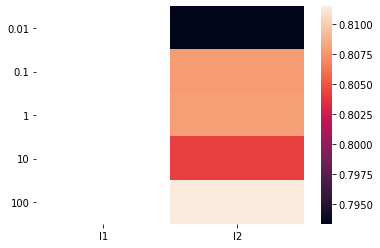

In [55]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())